In [101]:
import numpy as np
import pandas as pd
import seaborn as sns;sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import statsmodels.api as sm
import math
from math import sqrt

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import make_column_transformer

from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix, classification_report, auc
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score, KFold

from sklearn import tree
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from IPython.display import Image

from sklearn import neighbors
import itertools
import plotly.express as px

from itertools import chain
from matplotlib.pyplot import figure

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split
from sklearn.metrics import accuracy_score
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn import svm

from pprint import pprint
from time import time
import logging

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet as wn
from nltk import word_tokenize, pos_tag
from collections import defaultdict
#nltk.download('all')
#nltk.download('averaged_perceptron_tagger')

from collections import Counter
import re
import string

from gensim.parsing.preprocessing import remove_stopwords
from gensim.parsing.preprocessing import STOPWORDS

from textblob import TextBlob

from sklearn.pipeline import Pipeline

pd.set_option('display.float_format', lambda x: '%.5f' % x)


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers\averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping grammars\basque_grammars.zi

KeyboardInterrupt: 

In [68]:
df=pd.read_csv('train.txt',delimiter=";",header=None,names=['corpus','feeling'])

In [12]:
df

,corpus,feeling
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger


### Hipotesis Nula por clase

In [13]:
df.feeling.value_counts(normalize=True)

joy        0.33513
sadness    0.29163
anger      0.13494
fear       0.12106
love       0.08150
surprise   0.03575
Name: feeling, dtype: float64

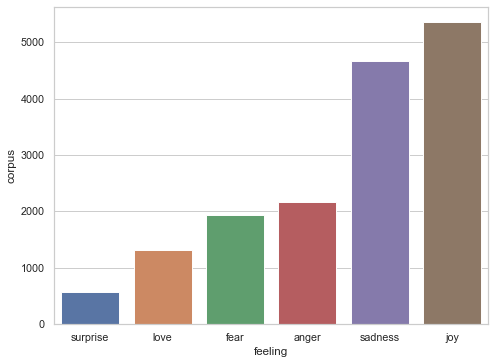

In [14]:
result=df.groupby(by="feeling").count().sort_values(by=['corpus']).reset_index()
fig=figure(figsize=(8, 6), dpi=70)
sns.barplot(x='feeling', y="corpus", data=result, order=result['feeling'])
plt.show()

### Instancio un modelo solo para probar "hipotesis nula"

Probar sobre Test para ver como da un modelo base sin intervencion del texto

### Data Cleaning

In [15]:
# Agrego un diccionario con contracciones y sus extensiones respectivas
contractions = { 
"ain't": "am not",
"aren't": "am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"i'd": "I had",
"i'd've": "I would have",
"i'll": "I will",
"i'll've": "I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that had",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there had",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they had",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [16]:
#Agrego las mismas palabras de las stop words pero sin apostrofes (ej: haven't, agrego havent)
stop_words=stopwords.words('english');

hifen =' '.join(stop_words)
hifen = re.sub("'", '', hifen)    
hifen=word_tokenize(hifen)

stop_words.extend(hifen)
stop_words.append('shall')
stop_words.append('im')

In [8]:
def clean_text(text):
    '''Remove unwanted characters, stopwords, and format the text to create fewer nulls word embeddings'''
    
    # Convert words to lower case
    text = text.lower()
    
    # Replace contractions with their longer forms 
    if True:
        text = text.split()
        new_text = []
        for word in text:
            if word in contractions:
                new_text.append(contractions[word])
            else:
                new_text.append(word)
        text = " ".join(new_text)
    
    # Format words and remove unwanted characters
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'&amp;', '', text) 
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'\'', ' ', text)
    
    # remove stop words
    text = text.split()
    stops = stop_words
    text = [w for w in text if not w in stops]
    text = " ".join(text)
        
    # spelling correction (tarda demasiado y no da buenos resultados)
    #text = TextBlob(text).correct() 
    #text = text.__str__() # opcion 1 (tarda demasiado)
    #text = '{}'.format(text) #opcion2 (tarda demasiado)
    #text = str(TextBlob(text).correct()) #opcion3 (tarda demasiado)
    
    #Lemmatize 
    
    #Defaultdict is a container like dictionaries present in the module collections. 
    #Defaultdict is a sub-class of the dictionary class that returns a dictionary-like object. 
    #The functionality of both dictionaries and defaultdict are almost same except for the fact that defaultdict never raises a KeyError. 
    #It provides a default value for the key that does not exists.

    tag_map = defaultdict(lambda : wn.NOUN)
    tag_map['J'] = wn.ADJ
    tag_map['V'] = wn.VERB
    tag_map['R'] = wn.ADV

    tokens = word_tokenize(text)
    lmtzr = WordNetLemmatizer()
    
    new_text2=[]
    
    for token, tag in pos_tag(tokens):
        lemma = lmtzr.lemmatize(token, tag_map[tag[0]])
        new_text2.append(lemma)
        text=" ".join(new_text2)
        
    return text

clean_lambda = lambda x: clean_text(x)

In [9]:
df['clean_corpus'] = df.corpus.apply(clean_lambda)

In [11]:
df.head()

,corpus,feeling,clean_corpus
0,i didnt feel humiliated,sadness,feel humiliate
1,i can go from feeling so hopeless to so damned...,sadness,go feeling hopeless damn hopeful around someon...
2,im grabbing a minute to post i feel greedy wrong,anger,grab minute post feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,love,ever feel nostalgic fireplace know still property
4,i am feeling grouchy,anger,feel grouchy


### Data Analysis

In [17]:
clases=list(df.feeling.unique())
clases=sorted(clases)
clases

['anger', 'fear', 'joy', 'love', 'sadness', 'surprise']

In [13]:
#Veo las palabras más frecuentes por feeling

params_tfv = {'max_features': 5000,
             'max_df':0.75,
             'ngram_range': (1, 2),
             'stop_words': 'english',
             'strip_accents': 'unicode',
             'norm': 'l1',
             'sublinear_tf': True,
             'use_idf': True}

vectorizer=TfidfVectorizer(**params_tfv)

most_common=[]

for clase in clases:
    X=vectorizer.fit_transform(df[df['feeling']==clase]['clean_corpus']);
    counts=X.sum(axis=0);
    counts=np.array(counts);
    
    indices=np.argsort(counts);
    valores=np.sort(counts);
    indices=indices[0][::-1];
    valores=valores[0][::-1];
    terms=np.array(vectorizer.get_feature_names_out());
    most_common.append(terms[indices[:20]])

    print('\n Clase ',clase)
    print(terms[indices[:20]])


 Clase  anger
['like' 'feel like' 'feeling' 'irritable' 'angry' 'cranky' 'know' 'cold'
 'really' 'time' 'fuck' 'greedy' 'want' 'little' 'resentful' 'say' 'wrong'
 'make' 'think' 'selfish']

 Clase  fear
['feeling' 'like' 'feel like' 'little' 'vulnerable' 'bit' 'know' 'anxious'
 'weird' 'strange' 'insecure' 'feel little' 'feel vulnerable' 'nervous'
 'uncertain' 'afraid' 'want' 'terrify' 'make' 'apprehensive']

 Clase  joy
['like' 'feel like' 'feeling' 'make' 'really' 'time' 'pretty' 'good'
 'want' 'know' 'think' 'day' 'love' 'happy' 'feel pretty' 'say' 'need'
 'make feel' 'life' 'little']

 Clase  love
['like' 'love' 'feel like' 'feeling' 'feel love' 'sympathetic' 'hot'
 'horny' 'fond' 'care' 'passionate' 'want' 'delicate' 'feel sympathetic'
 'know' 'bless' 'really' 'accept' 'sweet' 'nostalgic']

 Clase  sadness
['like' 'feeling' 'feel like' 'know' 'make' 'really' 'time' 'think'
 'little' 'want' 'day' 'bit' 'ive' 'thing' 'bad' 'make feel' 'life' 'say'
 'feel little' 'pretty']

 Clase  

In [14]:
new_stop_words=list(chain(*most_common))

In [15]:
#Veo las palabras más repetidas de las palabras más frecuentes por feeling
Counter(new_stop_words).most_common()

[('like', 6),
 ('feel like', 6),
 ('feeling', 6),
 ('know', 5),
 ('want', 5),
 ('little', 5),
 ('really', 4),
 ('make', 4),
 ('time', 3),
 ('say', 3),
 ('think', 3),
 ('bit', 3),
 ('weird', 2),
 ('strange', 2),
 ('feel little', 2),
 ('pretty', 2),
 ('day', 2),
 ('love', 2),
 ('make feel', 2),
 ('life', 2),
 ('irritable', 1),
 ('angry', 1),
 ('cranky', 1),
 ('cold', 1),
 ('fuck', 1),
 ('greedy', 1),
 ('resentful', 1),
 ('wrong', 1),
 ('selfish', 1),
 ('vulnerable', 1),
 ('anxious', 1),
 ('insecure', 1),
 ('feel vulnerable', 1),
 ('nervous', 1),
 ('uncertain', 1),
 ('afraid', 1),
 ('terrify', 1),
 ('apprehensive', 1),
 ('good', 1),
 ('happy', 1),
 ('feel pretty', 1),
 ('need', 1),
 ('feel love', 1),
 ('sympathetic', 1),
 ('hot', 1),
 ('horny', 1),
 ('fond', 1),
 ('care', 1),
 ('passionate', 1),
 ('delicate', 1),
 ('feel sympathetic', 1),
 ('bless', 1),
 ('accept', 1),
 ('sweet', 1),
 ('nostalgic', 1),
 ('ive', 1),
 ('thing', 1),
 ('bad', 1),
 ('funny', 1),
 ('overwhelm', 1),
 ('curious',

In [16]:
# If more than 2 of the feelings have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(new_stop_words).most_common() if count > 2]
add_stop_words

['like',
 'feel like',
 'feeling',
 'know',
 'want',
 'little',
 'really',
 'make',
 'time',
 'say',
 'think',
 'bit']

In [156]:
#Agrego palabras adicionales
stop_words.extend(add_stop_words)
stop_words.append('feel')
stop_words.append('ive')
stop_words.append('still')
stop_words.append('one')
stop_words.append('get')
stop_words.append('would')
stop_words.append('today')
stop_words.append('pretty')
stop_words.append('right')
stop_words.append('much')
stop_words.append('even')
stop_words.append('life')
stop_words.append('people')
stop_words.append('time')
stop_words.append('going')
stop_words.append('bit')
stop_words.append('want')
stop_words.append('think')
stop_words.append('thinking')
stop_words.append('make')
stop_words.append('makes')
stop_words.append('things')
stop_words.append('something')
stop_words.append('could')
stop_words.append('day')
stop_words.append('saying')
stop_words.append('also')
stop_words.append('without')
stop_words.append('actually')
stop_words.append('say')
stop_words.append('always')
stop_words.append('feelings')   
stop_words.append('quite')   
stop_words.append('work')   
stop_words.append('way') 
stop_words.append('many') 
stop_words.append('around')
stop_words.append('back')


In [157]:
#Segunda limpieza

clases=['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'];

params_tfv = {'max_features': 5000,
             'max_df':0.75,
             'ngram_range': (1, 2),
             'stop_words': stop_words, # CAMBIO POR LISTA PERSONALIZADA DEFINIDA EN PASO ANTERIOR
             'strip_accents': 'unicode',
             'norm': 'l1',
             'sublinear_tf': True,
             'use_idf': True}

vectorizer=TfidfVectorizer(**params_tfv)

most_common3=[]

for clase in clases:
    X=vectorizer.fit_transform(df[df['feeling']==clase]['corpus']);
    counts=X.sum(axis=0);
    counts=np.array(counts);
    
    indices=np.argsort(counts);
    valores=np.sort(counts);
    indices=indices[0][::-1];
    valores=valores[0][::-1];
    terms=np.array(vectorizer.get_feature_names_out())
    most_common3.append(terms[indices[:20]]);

    print('\n Clase ',clase)
    print(terms[indices[:20]])


 Clase  sadness
['alone' 'disheartened' 'sorry' 'stressed' 'listless' 'bad' 'homesick'
 'discouraged' 'stupid' 'gloomy' 'devastated' 'low' 'depressed' 'pathetic'
 'horrible' 'punished' 'unhappy' 'defeated' 'sad' 'shitty']

 Clase  anger
['irritable' 'angry' 'cranky' 'cold' 'bothered' 'pissed' 'fucked'
 'annoyed' 'selfish' 'wronged' 'greedy' 'irritated' 'stressed' 'insulted'
 'dissatisfied' 'agitated' 'rebellious' 'mad' 'bitter' 'jealous']

 Clase  love
['delicate' 'hot' 'caring' 'nostalgic' 'loving' 'horny' 'naughty'
 'passionate' 'sympathetic' 'longing' 'liked' 'loved' 'fond' 'love'
 'accepted' 'supportive' 'blessed' 'beloved' 'sweet' 'supporting']

 Clase  surprise
['overwhelmed' 'funny' 'weird' 'amazed' 'strange' 'curious' 'impressed'
 'shocked' 'surprised' 'amazing' 'dazed' 'stunned' 'remember' 'started'
 'find' 'ludicrous' 'confused' 'dazed confused' 'sure' 'often']

 Clase  fear
['insecure' 'anxious' 'weird' 'shaken' 'vulnerable' 'scared' 'terrified'
 'apprehensive' 'nervous' 's

In [158]:
new_stop_words3=list(chain(*most_common3))

In [159]:
Counter(new_stop_words3).most_common()

[('stressed', 2),
 ('agitated', 2),
 ('love', 2),
 ('overwhelmed', 2),
 ('weird', 2),
 ('strange', 2),
 ('confused', 2),
 ('sure', 2),
 ('alone', 1),
 ('disheartened', 1),
 ('sorry', 1),
 ('listless', 1),
 ('bad', 1),
 ('homesick', 1),
 ('discouraged', 1),
 ('stupid', 1),
 ('gloomy', 1),
 ('devastated', 1),
 ('low', 1),
 ('depressed', 1),
 ('pathetic', 1),
 ('horrible', 1),
 ('punished', 1),
 ('unhappy', 1),
 ('defeated', 1),
 ('sad', 1),
 ('shitty', 1),
 ('irritable', 1),
 ('angry', 1),
 ('cranky', 1),
 ('cold', 1),
 ('bothered', 1),
 ('pissed', 1),
 ('fucked', 1),
 ('annoyed', 1),
 ('selfish', 1),
 ('wronged', 1),
 ('greedy', 1),
 ('irritated', 1),
 ('insulted', 1),
 ('dissatisfied', 1),
 ('rebellious', 1),
 ('mad', 1),
 ('bitter', 1),
 ('jealous', 1),
 ('delicate', 1),
 ('hot', 1),
 ('caring', 1),
 ('nostalgic', 1),
 ('loving', 1),
 ('horny', 1),
 ('naughty', 1),
 ('passionate', 1),
 ('sympathetic', 1),
 ('longing', 1),
 ('liked', 1),
 ('loved', 1),
 ('fond', 1),
 ('accepted', 1),
 

### Estaría bueno armar un wordcloud pero no me anda

### Vectorizamos el Dataframe Original

In [19]:
df.head()

,corpus,feeling,clean_corpus
0,i didnt feel humiliated,sadness,feel humiliate
1,i can go from feeling so hopeless to so damned...,sadness,go feeling hopeless damn hopeful around someon...
2,im grabbing a minute to post i feel greedy wrong,anger,grab minute post feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,love,ever feel nostalgic fireplace know still property
4,i am feeling grouchy,anger,feel grouchy


In [81]:
params_tfv = {'max_features': 5000,
             'max_df':0.75,
             'ngram_range': (1, 2),
             'stop_words': stop_words,
             'strip_accents': 'unicode',
             'norm': 'l1',
             'sublinear_tf': True,
             'use_idf': True}

vectorizer=TfidfVectorizer(**params_tfv)

TF = (Number of times term T appears in the particular row) / (number of terms in that row)

IDF = log(N/n), where, N is the total number of rows and n is the number of rows in which the word was present.

tf1['tfidf'] = tf1['tf'] * tf1['idf']

In [82]:
# Vectorizo el dataframe original
df_vect_matrix=vectorizer.fit_transform(df.clean_corpus)
df_vect_matrix.shape

(16000, 5000)

In [83]:
df_vect = pd.DataFrame(df_vect_matrix.toarray(), columns=vectorizer.get_feature_names_out())
df_vect.index = df.index
df_vect

,abandon,abc,abdomen,ability,abit,able,able find,able go,able help,able move,...,york,young,young woman,youth,youtube,zealand,zero,zombie,zone,zoom
0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
3,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
4,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
15996,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
15997,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
15998,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


### Dataset agrupado por Feeling

In [84]:
#Creo un dataframe nuevo donde uno todos los textos por sentimiento

sadness=' '.join(df[df.feeling=='sadness']['clean_corpus'])

anger=' '.join(df[df.feeling=='anger']['clean_corpus'])

love=' '.join(df[df.feeling=='love']['clean_corpus'])

surprise=' '.join(df[df.feeling=='surprise']['clean_corpus'])

fear=' '.join(df[df.feeling=='fear']['clean_corpus'])

joy=' '.join(df[df.feeling=='joy']['clean_corpus'])

d={'sadness':sadness,'anger':anger,'love':love,'surprise':surprise,'fear':fear,'joy':joy}

df_grouped=pd.DataFrame(list(d.items()),columns=['feeling','corpus'])

df_grouped=df_grouped.set_index(['feeling'])

In [85]:
df_grouped.head()

,corpus
feeling,
sadness,feel humiliate go feeling hopeless damn hopefu...
anger,grab minute post feel greedy wrong feel grouch...
love,ever feel nostalgic fireplace know still prope...
surprise,ive take milligrams time recommend amount ive ...
fear,feel confuse life teenager jade year old man f...


In [86]:
#Vectorizo el dataset limpio y agrupado

params_cv={'max_features': 5000,'max_df':0.75,'ngram_range': (1, 2),'stop_words': stop_words,'strip_accents': 'unicode'}

cv = CountVectorizer(**params_cv)
data_cv = cv.fit_transform(df_grouped.corpus)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_dtm.index = df_grouped.index
data_dtm

,aa,abandonment,abc,abdomen,abide,abit,able come,able express,able find,able go,...,youthful,youtube,yuuki,zach,zealand,zero,zombie,zone,zoom,zumba
feeling,,,,,,,,,,,,,,,,,,,,,
sadness,1,1,1,2,0,2,2,0,1,2,...,0,0,0,0,1,1,3,0,3,0
anger,1,1,0,0,1,1,0,0,0,0,...,1,0,0,0,0,1,2,0,0,0
love,0,0,0,0,0,0,0,1,1,0,...,0,2,0,1,0,0,0,2,0,1
surprise,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
fear,1,0,1,1,0,1,0,0,3,0,...,0,0,1,0,0,0,0,1,0,0
joy,0,1,2,1,2,0,1,2,0,2,...,2,4,1,2,2,4,0,8,2,2


In [87]:
data=data_dtm.transpose()

In [88]:
# Find the number of unique words that each feeling uses

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for feeling in data.columns:
    uniques = data[feeling].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(clases, unique_list)), columns=['feeling', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,feeling,unique_words
3,surprise,626
2,love,1423
4,fear,1828
1,anger,2027
0,sadness,3364
5,joy,3757


In [89]:
# Armo un diccionario con la cantidad de elementos por sentimiento
texts_by_feeling=dict(df.feeling.value_counts()) 

# Find the total number of words by feeling (normalizado por la cantidad de elementos)
total_list = []
for feeling in data.columns:
    totals = sum(data[feeling])
    total_list.append(totals)

# Let's add some columns to our dataframe
data_words['total_words'] = total_list
data_words['unique_ratio'] = data_words['unique_words'] / data_words['total_words']

# Sort the dataframe by unique_ratio to see how people talks with each feeling
data_wpm_sort = data_words.sort_values(by='unique_ratio')
data_wpm_sort

,feeling,unique_words,total_words,unique_ratio
5,joy,3757,12328,0.30475
0,sadness,3364,10120,0.33241
1,anger,2027,4496,0.45085
4,fear,1828,3787,0.48270
2,love,1423,2666,0.53376
3,surprise,626,948,0.66034


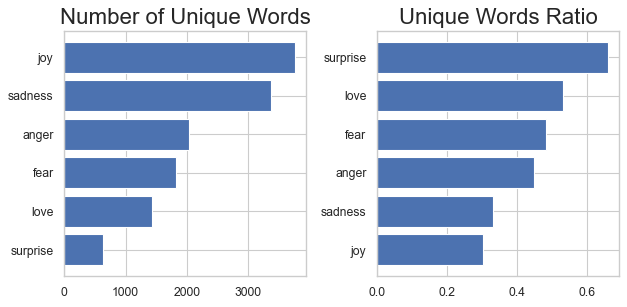

In [90]:
# Let's plot our findings
import numpy as np

figure(figsize=(8, 4), dpi=80)

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.feeling)
plt.title('Number of Unique Words', fontsize=20)

plt.subplot(1, 2, 2)
plt.barh(y_pos, data_wpm_sort.unique_ratio, align='center')
plt.yticks(y_pos, data_wpm_sort.feeling)
plt.title('Unique Words Ratio', fontsize=20)

plt.tight_layout()
plt.show()

Conclusión: Es interesante ver la inversión del orden de sentimientos entre cantidad total de palabras únicas y el ratio de palabras únicas.
Observamos dos grupos bien diferenciados entre sadness y joy (grupo 1) vs el resto de los sentimientos (grupo 2), donde vemos que el primer grupo si bien posee la mayor cantidad de palabras únicas, comparte gran parte del vocabulario para expresarse (unique word ratio) mientras que el segundo posee un vocabulario más rico.

In [91]:
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

df_grouped['polarity'] = df_grouped['corpus'].apply(pol)
df_grouped['subjectivity'] = df_grouped['corpus'].apply(sub)
df_grouped

,corpus,polarity,subjectivity
feeling,,,
sadness,feel humiliate go feeling hopeless damn hopefu...,-0.10226,0.58061
anger,grab minute post feel greedy wrong feel grouch...,-0.08556,0.58210
love,ever feel nostalgic fireplace know still prope...,0.17093,0.60439
surprise,ive take milligrams time recommend amount ive ...,0.08783,0.60406
fear,feel confuse life teenager jade year old man f...,-0.06313,0.55911
joy,petronas year feel petronas perform well make ...,0.25006,0.60556


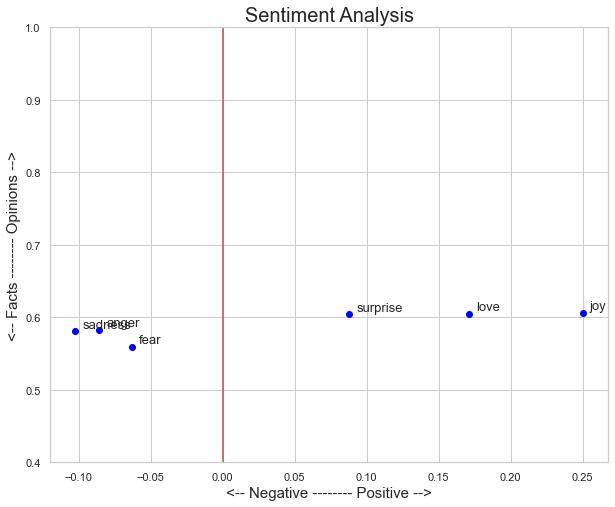

In [92]:
# Let's plot the results

plt.rcParams['figure.figsize'] = [10, 8]

for index, feeling in enumerate(df_grouped.index):
    x = df_grouped.polarity.loc[feeling]
    y = df_grouped.subjectivity.loc[feeling]
    plt.scatter(x, y, color='blue')
    plt.text(x+.005, y+.005, df_grouped.index[index], fontsize=13)
    plt.ylim(0.4,1) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)
x1, y1 = [0, 0], [0, 1]
plt.plot(x1, y1, c='r')

plt.show()

Conclusión: Podemos ver que la distribución de los sentimientos de acuerdo a la polaridad es razonable de acuerdo a la realidad.
Una observación muy interesante es la cercanía del enojo con la tristeza. Acaso no todo enojo esconde tristeza? 

## Entrenamiento de modelos

### Dataset de Test

In [6]:
df_test=pd.read_csv('test.txt',delimiter=";",header=None,names=['corpus','feeling'])

In [94]:
df_test['clean_corpus'] = df_test.corpus.apply(clean_lambda)

In [95]:
df_test.head()

,corpus,feeling,clean_corpus
0,im feeling rather rotten so im not very ambiti...,sadness,rather rotten ambitious
1,im updating my blog because i feel shitty,sadness,update blog shitty
2,i never make her separate from me because i do...,sadness,never separate ever ashamed
3,i left with my bouquet of red and yellow tulip...,joy,leave bouquet red yellow tulip arm slightly op...
4,i was feeling a little vain when i did this one,sadness,vain


#### Matriz Sparsa de Test

In [96]:
df_test_matrix=vectorizer.fit_transform(df_test.clean_corpus)
df_test_matrix

<2000x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 14821 stored elements in Compressed Sparse Row format>

### Modelo Random Forest con Polarity y Subjetivity

Voy a probar un modelo únicamente con polarity y subjetivity de TextBlob

In [36]:
df_pol=df.copy()

In [37]:
df_pol['polarity'] = df_pol['corpus'].apply(pol)
df_pol['subjectivity'] = df_pol['corpus'].apply(sub)
df_pol

,corpus,feeling,clean_corpus,polarity,subjectivity
0,i didnt feel humiliated,sadness,feel humiliate,0.00000,0.00000
1,i can go from feeling so hopeless to so damned...,sadness,go feeling hopeless damn hopeful around someon...,0.00000,0.00000
2,im grabbing a minute to post i feel greedy wrong,anger,grab minute post feel greedy wrong,-0.50000,0.90000
3,i am ever feeling nostalgic about the fireplac...,love,ever feel nostalgic fireplace know still property,-0.50000,1.00000
4,i am feeling grouchy,anger,feel grouchy,0.00000,0.00000
...,...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,brief time beanbag say anna feel like beaten,0.00000,0.43333
15996,i am now turning and i feel pathetic that i am...,sadness,turn feel pathetic still wait table sub teach ...,-1.00000,1.00000
15997,i feel strong and good overall,joy,feel strong good overall,0.37778,0.44444
15998,i feel like this was such a rude comment and i...,anger,feel like rude comment glad,0.06667,0.70000


In [38]:
params={'max_depth': 10,'class_weight': "balanced"}
clf = RandomForestClassifier(**params)

In [39]:
X=df_pol[['polarity','subjectivity']]
y=df_pol.feeling

In [40]:
clf.fit(X, y)

RandomForestClassifier(class_weight='balanced', max_depth=10)

In [41]:
df_test_rf_pol=df_test.copy()

In [42]:
df_test_rf_pol['polarity'] = df_test_rf_pol['corpus'].apply(pol)
df_test_rf_pol['subjectivity'] = df_test_rf_pol['corpus'].apply(sub)

In [43]:
X_test_rf_pol=df_test_rf_pol[['polarity','subjectivity']]
y_test_rf_pol=df_test_rf_pol.feeling

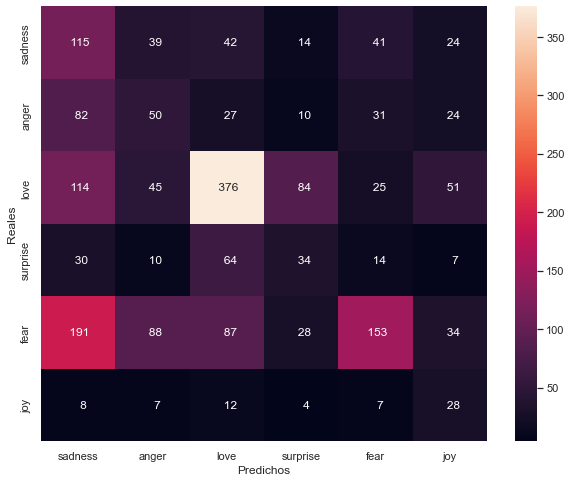

              precision    recall  f1-score   support

       anger     0.2130    0.4182    0.2822       275
        fear     0.2092    0.2232    0.2160       224
         joy     0.6184    0.5410    0.5771       695
        love     0.1954    0.2138    0.2042       159
     sadness     0.5646    0.2633    0.3592       581
    surprise     0.1667    0.4242    0.2393        66

    accuracy                         0.3780      2000
   macro avg     0.3279    0.3473    0.3130      2000
weighted avg     0.4527    0.3780    0.3920      2000



In [44]:
# Calculamos las predicciones y métricas sobre la data de prueba

predicciones=clf.predict(X_test_rf_pol)
sns.heatmap(confusion_matrix(y_test_rf_pol, predicciones), annot=True, fmt='4d',xticklabels=clases, yticklabels=clases)
plt.xlabel('Predichos')
plt.ylabel('Reales')
plt.show()
print(classification_report(y_test_rf_pol, predicciones, digits=4))

### Grid Search para mejorar el accuracy de RF con Polarity y Subjetivity

No lo corri por el tiempo computacional elevado y dado que el modelo previo no ha tenido buenos resultados.

### Modelo MultinomialNB con df_clean

In [18]:
class clean_texto(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        pass
        
    @staticmethod
    def clean_text(text):
        '''Remove unwanted characters, stopwords, and format the text to create fewer nulls word embeddings'''

        # Convert words to lower case
        text = text.lower()

        # Replace contractions with their longer forms 
        if True:
            text = text.split()
            new_text = []
            for word in text:
                if word in contractions:
                    new_text.append(contractions[word])
                else:
                    new_text.append(word)
            text = " ".join(new_text)

        # Format words and remove unwanted characters
        text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
        text = re.sub(r'\<a href', ' ', text)
        text = re.sub(r'&amp;', '', text) 
        text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
        text = re.sub(r'<br />', ' ', text)
        text = re.sub(r'\'', ' ', text)

        # remove stop words
        #if remove_stopwords:
        text = text.split()
        stops = stop_words
        text = [w for w in text if not w in stops]
        text = " ".join(text)

        # spelling correction (tarda demasiado y no da buenos resultados)
        #text = TextBlob(text).correct() 
        #text = text.__str__() # opcion 1 (tarda demasiado)
        #text = '{}'.format(text) #opcion2 (tarda demasiado)
        #text = str(TextBlob(text).correct()) #opcion3 (tarda demasiado)

        #Lemmatize 

        #Defaultdict is a container like dictionaries present in the module collections. 
        #Defaultdict is a sub-class of the dictionary class that returns a dictionary-like object. 
        #The functionality of both dictionaries and defaultdict are almost same except for the fact that defaultdict never raises a KeyError. 
        #It provides a default value for the key that does not exists.
        
        tag_map = defaultdict(lambda : wn.NOUN)
        tag_map['J'] = wn.ADJ
        tag_map['V'] = wn.VERB
        tag_map['R'] = wn.ADV

        tokens = word_tokenize(text)
        lmtzr = WordNetLemmatizer()

        new_text2=[]

        for token, tag in pos_tag(tokens):
            lemma = lmtzr.lemmatize(token, tag_map[tag[0]])
            new_text2.append(lemma)
            text=" ".join(new_text2)
        
        return text
    
    def fit(self, texto, y=None):
        return self

    def transform(self, texto):
        if isinstance(texto, pd.Series):
            texto=texto.apply(lambda x: self.clean_text(x))
        else:
            texto=pd.Series(texto)
            texto=texto.apply(lambda x: self.clean_text(x))
            
        return texto

In [19]:
parameters_vect = {
   # "max_df": (0.5),
    "strip_accents": ('unicode'), 
    "stop_words": (None),
    'max_features': (5000),
    "ngram_range": (1, 2),  
    'use_idf': (True),
    'sublinear_tf': (True),
    'norm': ('l1')
}

parameters_clf ={
    "alpha": (0.5),
    "fit_prior": (False)
}


pasos = [('clean_texto',clean_texto()),
         ("vect", TfidfVectorizer(**parameters_vect)),
         ("clf", MultinomialNB(**parameters_clf))]

pipe=Pipeline(pasos)

In [20]:
pipe.fit(df.corpus, df.feeling)

Pipeline(steps=[('clean_texto', clean_texto()),
                ('vect',
                 TfidfVectorizer(max_features=5000, ngram_range=(1, 2),
                                 norm='l1', strip_accents='unicode',
                                 sublinear_tf=True)),
                ('clf', MultinomialNB(alpha=0.5, fit_prior=False))])

In [10]:
X_test_mnb=df_test['corpus']

In [11]:
y_test_mnb=df_test['feeling']

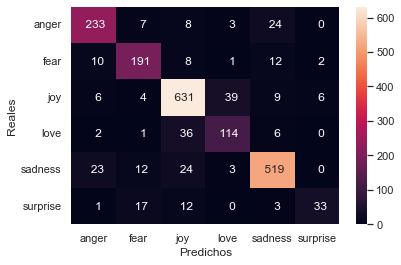

              precision    recall  f1-score   support

       anger     0.8473    0.8473    0.8473       275
        fear     0.8233    0.8527    0.8377       224
         joy     0.8776    0.9079    0.8925       695
        love     0.7125    0.7170    0.7147       159
     sadness     0.9058    0.8933    0.8995       581
    surprise     0.8049    0.5000    0.6168        66

    accuracy                         0.8605      2000
   macro avg     0.8285    0.7864    0.8014      2000
weighted avg     0.8600    0.8605    0.8589      2000



In [14]:
# Calculamos las predicciones y métricas sobre la data de prueba

predicciones=pipe.predict(X_test_mnb)
sns.heatmap(confusion_matrix(y_test_mnb, predicciones), annot=True, fmt='4d',xticklabels=clases, yticklabels=clases)
plt.xlabel('Predichos')
plt.ylabel('Reales')
plt.show()
print(classification_report(y_test_mnb, predicciones, digits=4))

In [39]:
x=pipe.predict("Today I feel confident while talking to people, and feel that I have been able to develop some control over my own life.")
x[0]

'joy'

Conclusión Multinomial Naive Bayes. Buena performance. Modelo Elegido.

### Modelo Random Forest con df_clean

Para el RF hay que usar la matriz sparsa convertida en array como features y como y los valores de las clases

In [49]:
X_rf=df_vect_matrix.toarray() # es el dataset original vectorizado
y_rf=df.feeling.values

In [50]:
X_test_rf=df_test_matrix.toarray()
y_test_rf=df_test.feeling.values

In [51]:
param_rf={
 'bootstrap': True,
 'criterion': 'entropy',
 'class_weight':'balanced',
 'n_estimators': 100
}
classifier=RandomForestClassifier(**param_rf)
classifier.fit(X_rf,y_rf)

RandomForestClassifier(class_weight='balanced', criterion='entropy')

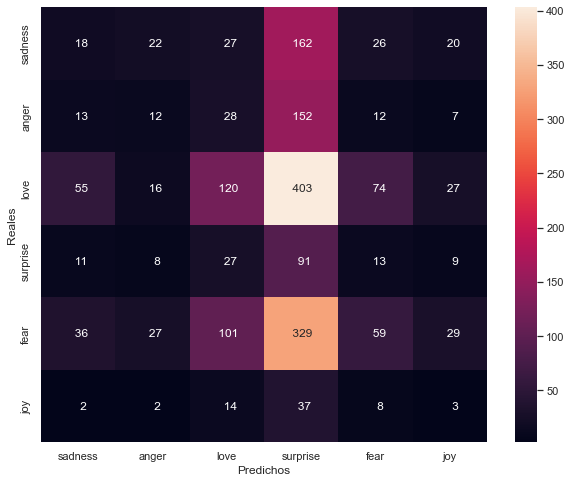

              precision    recall  f1-score   support

       anger     0.1333    0.0655    0.0878       275
        fear     0.1379    0.0536    0.0772       224
         joy     0.3785    0.1727    0.2372       695
        love     0.0775    0.5723    0.1365       159
     sadness     0.3073    0.1015    0.1527       581
    surprise     0.0316    0.0455    0.0373        66

    accuracy                         0.1515      2000
   macro avg     0.1777    0.1685    0.1214      2000
weighted avg     0.2618    0.1515    0.1596      2000



In [52]:
# Calculamos las predicciones y métricas sobre la data de prueba

predicciones=classifier.predict(X_test_rf)
sns.heatmap(confusion_matrix(y_test_rf, predicciones), annot=True, fmt='4d',xticklabels=clases, yticklabels=clases)
plt.xlabel('Predichos')
plt.ylabel('Reales')
plt.show()
print(classification_report(y_test_rf, predicciones, digits=4))

### Grid Search Random Forest con df_clean

no son los mejores hiperparámetros, fue una primera iteración de prueba (probar con más max depth)

In [53]:
param_best_rf={'bootstrap': False, 
               'class_weight': 'balanced_subsample', 
               'criterion': 'gini',
               'max_depth': 8, 
               'max_features': 'auto', 
               'min_samples_leaf': 8,
               'min_samples_split': 5, 
               'n_estimators': 100}

In [54]:
classifier_best=RandomForestClassifier(**param_best_rf)
classifier_best.fit(X_rf,y_rf)

RandomForestClassifier(bootstrap=False, class_weight='balanced_subsample',
                       max_depth=8, min_samples_leaf=8, min_samples_split=5)

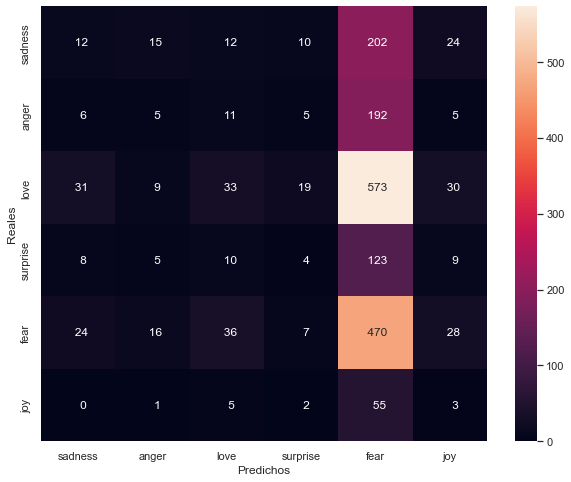

              precision    recall  f1-score   support

       anger     0.1481    0.0436    0.0674       275
        fear     0.0980    0.0223    0.0364       224
         joy     0.3084    0.0475    0.0823       695
        love     0.0851    0.0252    0.0388       159
     sadness     0.2910    0.8090    0.4281       581
    surprise     0.0303    0.0455    0.0364        66

    accuracy                         0.2635      2000
   macro avg     0.1602    0.1655    0.1149      2000
weighted avg     0.2308    0.2635    0.1706      2000



In [55]:
# Calculamos las predicciones y métricas sobre la data de prueba

predicciones=classifier_best.predict(X_test_rf)
sns.heatmap(confusion_matrix(y_test_rf, predicciones), annot=True, fmt='4d',xticklabels=clases, yticklabels=clases)
plt.xlabel('Predichos')
plt.ylabel('Reales')
plt.show()
print(classification_report(y_test_rf, predicciones, digits=4))

Conclusión RF: Vemos que mejoramos el accuracy al predecir casi todo como la clase mayoritaria ('Joy'). Esto demuestra una performance muy pobre. 

### Multinomial Logistic Regression

In [56]:
lr_parameters={'C': 1.0,
               'class_weight': 'balanced',
               'fit_intercept': False,
               'max_iter': 500, 
               'multi_class': 'multinomial', 
               'penalty': 'l2',
               'solver': 'lbfgs'}


In [57]:
lr = LogisticRegression(**lr_parameters)

In [58]:
lr.fit(X_rf,y_rf)

LogisticRegression(class_weight='balanced', fit_intercept=False, max_iter=500,
                   multi_class='multinomial')

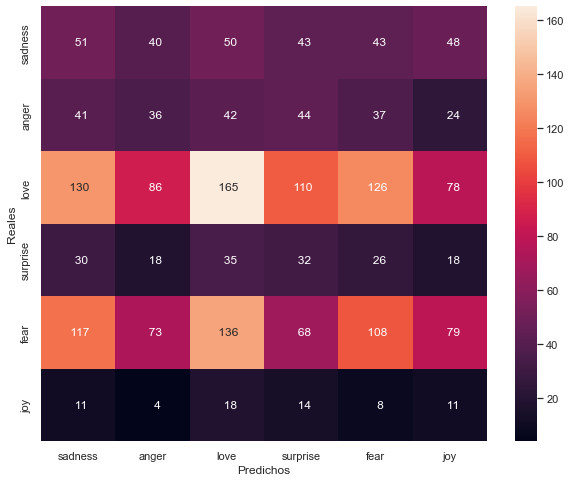

              precision    recall  f1-score   support

       anger     0.1342    0.1855    0.1557       275
        fear     0.1401    0.1607    0.1497       224
         joy     0.3700    0.2374    0.2892       695
        love     0.1029    0.2013    0.1362       159
     sadness     0.3103    0.1859    0.2325       581
    surprise     0.0426    0.1667    0.0679        66

    accuracy                         0.2015      2000
   macro avg     0.1834    0.1896    0.1719      2000
weighted avg     0.2624    0.2015    0.2193      2000



In [59]:
# Calculamos las predicciones y métricas sobre la data de prueba

predicciones=lr.predict(X_test_rf)
sns.heatmap(confusion_matrix(y_test_rf, predicciones), annot=True, fmt='4d',xticklabels=clases, yticklabels=clases)
plt.xlabel('Predichos')
plt.ylabel('Reales')
plt.show()
print(classification_report(y_test_rf, predicciones, digits=4))

Conclusión Multi Linear Regression: Mala performance. 

### Cosas viejas

### Viejo Pipeline sin función de limpieza

### Función original con Lemmatización standard

def lemmatized_words(text,df):
    lemm = nltk.stem.WordNetLemmatizer()
    df['lemmatized_text'] = list(map(lambda word:
                                     list(map(lemm.lemmatize, word)),
                                     df.Text_Cleaned))

### Función con Lemmatización Superadora

### Problema Programación (RESUELTO)
1. La clase va a recibir un objeto series para entrenar, pero para predecir lo ideal sería que pueda hacerlo con un string. 

### Resolución Pipeline con funcion limpieza

### Telegram BOT

In [47]:
import telegram.ext 

In [48]:
with open('lala.py','r') as f:
    token=f.read()

In [49]:
updater=telegram.ext.Updater(token,use_context=True)
disp=updater.dispatcher

In [50]:
def start(update,context):
    update.message.reply_text("Hello I'm SentiBot, I'm here for you, please tell me how you feel")

In [51]:
def ayuda(update, context):
     update.message.reply_text("This is a Sentiment Analyzer Bot created by Group 2 of DH Academy")

In [52]:
def handle_message(update,context):   
    user_message=update.message.text
    if user_message == "111":
        return update.message.reply_text("That's not a feeling")
    else:
        prediction= pipe.predict(user_message)[0]
        return update.message.reply_text(f"You feel {prediction}")
    

In [53]:
disp.add_handler(telegram.ext.CommandHandler("start",start))
disp.add_handler(telegram.ext.CommandHandler("help",ayuda))
disp.add_handler(telegram.ext.MessageHandler(telegram.ext.Filters.text,handle_message))

In [54]:
updater.start_polling()
updater.idle()

### Negation Handling Test

In [306]:
# negate_sequence(text)
#   text: sentence to process (creation of uni/bi/trigrams
#    is handled here)
#
# Detects negations and transforms negated words into 'not_' form
#
def negate_sequence(text):
    
    def antonyms_for(word):
        antonyms = set()
        for ss in wn.synsets(word):
            for lemma in ss.lemmas():
                any_pos_antonyms = [ antonym.name() for antonym in lemma.antonyms() ]
                for antonym in any_pos_antonyms:
                    antonym_synsets = wn.synsets(antonym)
                    if wn.ADJ not in [ ss.pos() for ss in antonym_synsets ]:
                        continue
                    antonyms.add(antonym)
        if antonyms==set():
            return word
        else:
            antonyms=list(antonyms)
            return antonyms[0]
    
    negation = False
    delims = "?.,!:;"
    result = []
    words = text.split()
    prev = None
    pprev = None
    for word in words:
        stripped = word.strip(delims).lower()
        negated = "not " + stripped if negation else stripped
        result.append(negated)
        
        if prev:
            bigram = prev + " " + negated
            pprev = prev
        prev = negated

        if any(neg in word for neg in ["not", "n't", "no"]):
            negation = not negation

        if any(c in word for c in delims):
            negation = False

    for elements in result:
        
        element=word_tokenize(elements)
        
        if element[0]=="not" and len(element)>1 and element[1]!="feel":
            i=result.index(elements)
            if i+1==len(result):
                result= result[:i]+[antonyms_for(element[1])]
            elif i+1<len(result):
                result= result[:i]+[antonyms_for(element[1])]+result[i+1:]
        '''        
        if element[0]=="not" and len(element)>1 and element[1]=="feel":
            i=result.index(elements)
            if i+1==len(result):
                result= result[:i]+[element[1]]
            elif i+1<len(result):
                result= result[:i]+[element[1]]+result[i+1:]
        
        if element[0]=="not" and len(element)==1:
            i=result.index(elements)
            if i+1==len(result):
                result= result[:i]+[""]
            elif i+1<len(result):
                result= result[:i]+[""]+result[i+1:]
        '''

    return " ".join(result)

In [307]:
negate_sequence("I don't feel sad")

"i don't not feel glad"

In [309]:
pipe.predict("i don't not feel glad")

array(['joy'], dtype='<U8')

In [311]:
class negation_transformer(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        pass
        
    @staticmethod
    # negate_sequence(text)
    #   text: sentence to process (creation of uni/bi
    #    is handled here)
    #
    # Detects negations and transforms negated words into 'not_' form
    #
    def negate_sequence(text):

        def antonyms_for(word):
            antonyms = set()
            for ss in wn.synsets(word):
                for lemma in ss.lemmas():
                    any_pos_antonyms = [ antonym.name() for antonym in lemma.antonyms() ]
                    for antonym in any_pos_antonyms:
                        antonym_synsets = wn.synsets(antonym)
                        if wn.ADJ not in [ ss.pos() for ss in antonym_synsets ]:
                            continue
                        antonyms.add(antonym)
            if antonyms==set():
                return word
            else:
                antonyms=list(antonyms)
                return antonyms[0]

        negation = False
        delims = "?.,!:;"
        result = []
        words = text.split()
        prev = None
        pprev = None
        for word in words:
            stripped = word.strip(delims).lower()
            negated = "not " + stripped if negation else stripped
            result.append(negated)

            if prev:
                bigram = prev + " " + negated
                pprev = prev
            prev = negated

            if any(neg in word for neg in ["not", "n't", "no"]):
                negation = not negation

            if any(c in word for c in delims):
                negation = False

        for elements in result:

            element=word_tokenize(elements)

            if element[0]=="not" and len(element)>1 and element[1]!="feel":
                i=result.index(elements)
                if i+1==len(result):
                    result= result[:i]+[antonyms_for(element[1])]
                elif i+1<len(result):
                    result= result[:i]+[antonyms_for(element[1])]+result[i+1:]
            '''        
            if element[0]=="not" and len(element)>1 and element[1]=="feel":
                i=result.index(elements)
                if i+1==len(result):
                    result= result[:i]+[element[1]]
                elif i+1<len(result):
                    result= result[:i]+[element[1]]+result[i+1:]

            if element[0]=="not" and len(element)==1:
                i=result.index(elements)
                if i+1==len(result):
                    result= result[:i]+[""]
                elif i+1<len(result):
                    result= result[:i]+[""]+result[i+1:]
            '''

        return " ".join(result)
    
    def fit(self, texto, y=None):
        return self

    def transform(self, texto):
        if isinstance(texto, pd.Series):
            texto=texto.apply(lambda x: self.negate_sequence(x))
        else:
            texto=pd.Series(texto)
            texto=texto.apply(lambda x: self.negate_sequence(x))
            
        return texto

In [312]:
parameters_vect = {
   # "max_df": (0.5),
    "strip_accents": ('unicode'), 
    "stop_words": (None),
    'max_features': (5000),
    "ngram_range": (1, 2),  
    'use_idf': (True),
    'sublinear_tf': (True),
    'norm': ('l1')
}

parameters_clf ={
    "alpha": (0.5),
    "fit_prior": (False)
}


pasos = [('negation_transformer',negation_transformer()),
         ('clean_texto',clean_texto()),
         ("vect", TfidfVectorizer(**parameters_vect)),
         ("clf", MultinomialNB(**parameters_clf))]

pipe2=Pipeline(pasos)

In [313]:
pipe2.fit(df.corpus, df.feeling)

Pipeline(steps=[('negation_transformer', negation_transformer()),
                ('clean_texto', clean_texto()),
                ('vect',
                 TfidfVectorizer(max_features=5000, ngram_range=(1, 2),
                                 norm='l1', strip_accents='unicode',
                                 sublinear_tf=True)),
                ('clf', MultinomialNB(alpha=0.5, fit_prior=False))])

In [314]:
pipe2.predict("i don't feel happy")

array(['sadness'], dtype='<U8')

### Probar SVM

In [ ]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)